# Dataset - Iris

## Basics

In [25]:
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset from sklearn
iris = load_iris()

# Convert dataset into pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Map target values to target names
iris_df['target'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Histogram

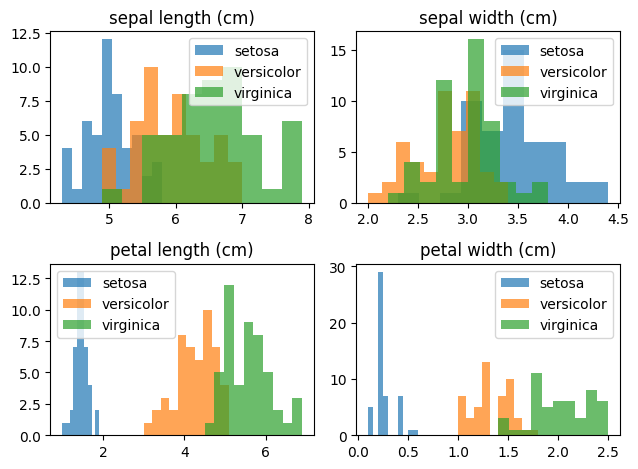

In [28]:
import matplotlib.pyplot as plt

# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 2)

# Create histograms for each feature
features = iris.feature_names
for i, ax in enumerate(axs.flat):
    if i < len(features):
        for label in iris_df['target'].unique():
            ax.hist(iris_df[iris_df['target'] == label][features[i]], label=label, alpha=0.7)
            ax.set_title(features[i])
            ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


## Scatter

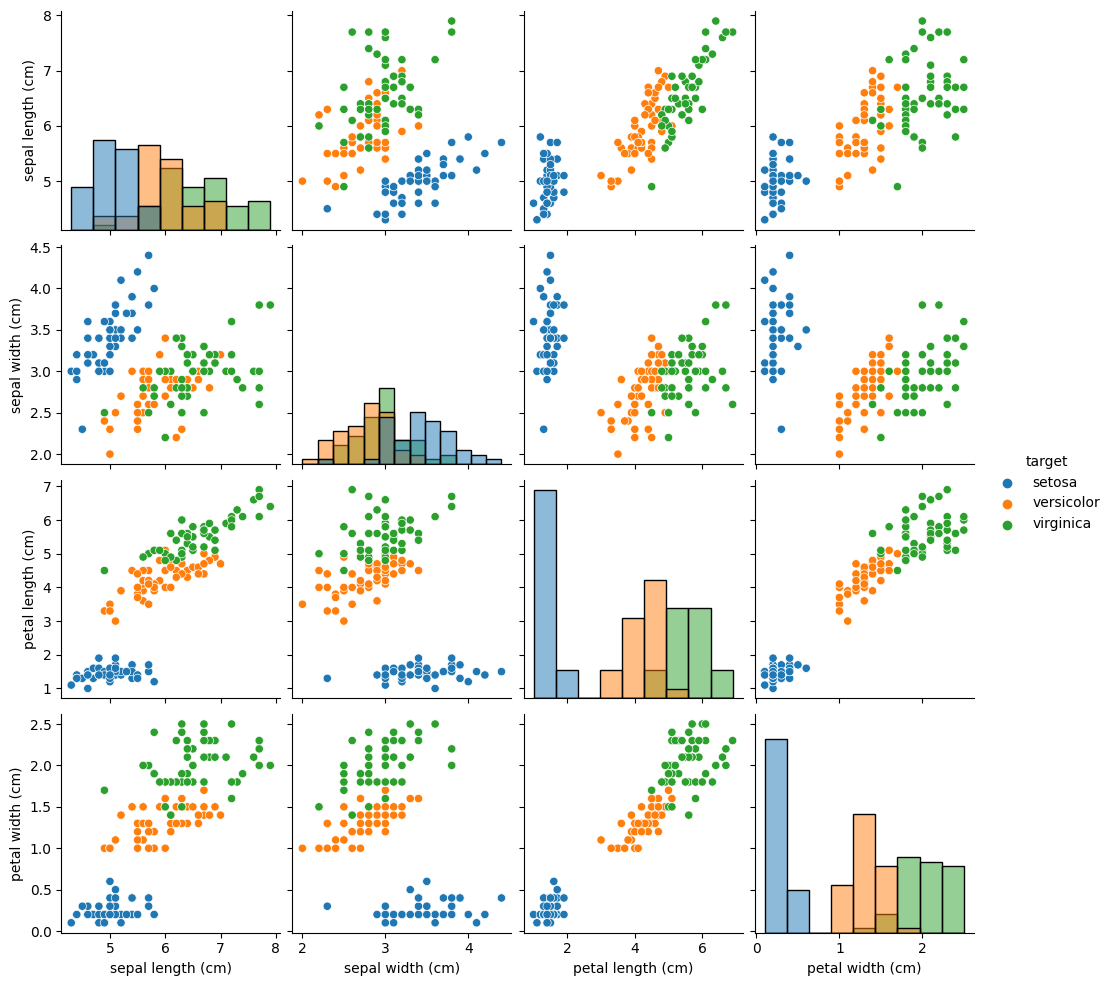

In [29]:
import seaborn as sns

# Create a pairplot (scatter plot matrix)
sns.pairplot(iris_df, hue='target', diag_kind='hist')

# Show the plot
plt.show()


## Distributions

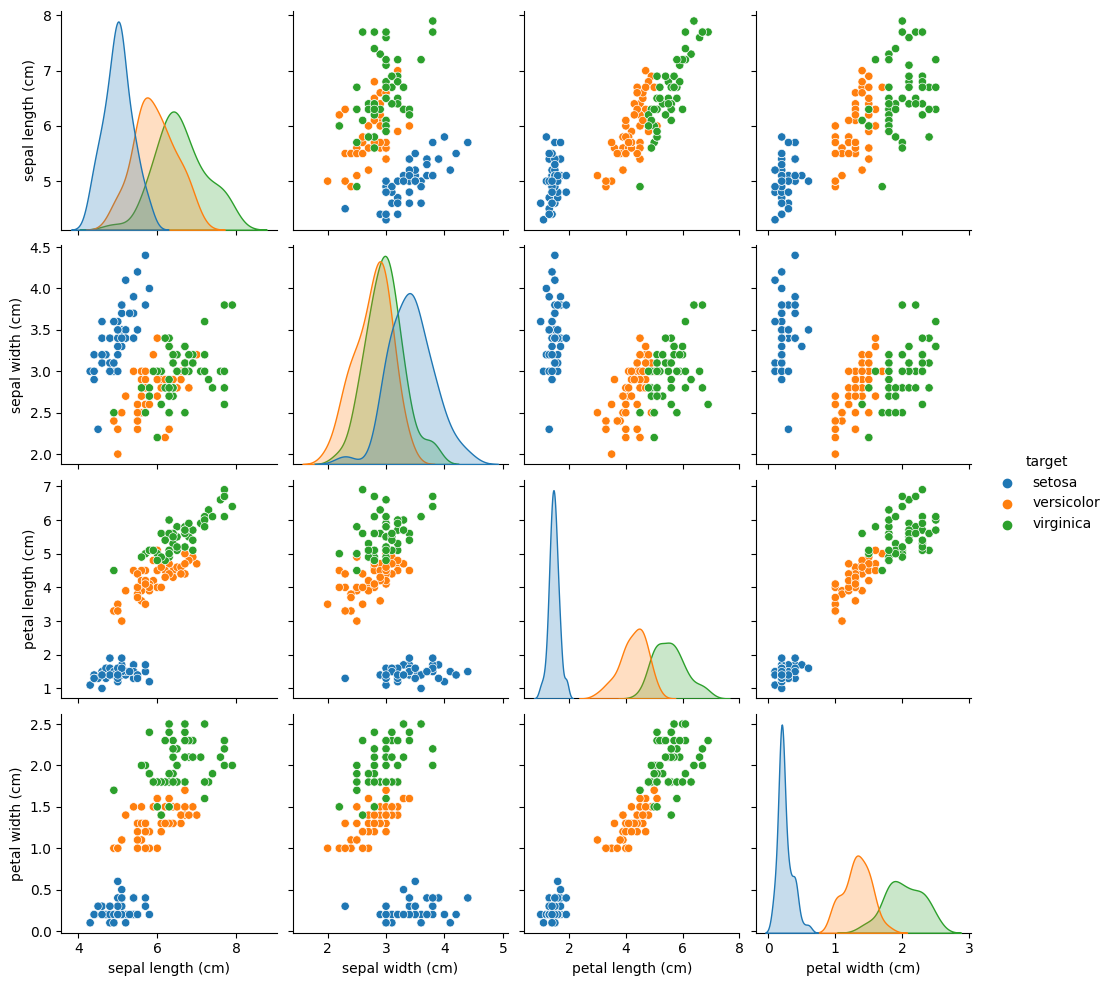

In [30]:
import seaborn as sns

# Pair plot of the iris dataset
sns.pairplot(iris_df, hue='target')
